In [34]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # Suppresses INFO and WARNING messages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

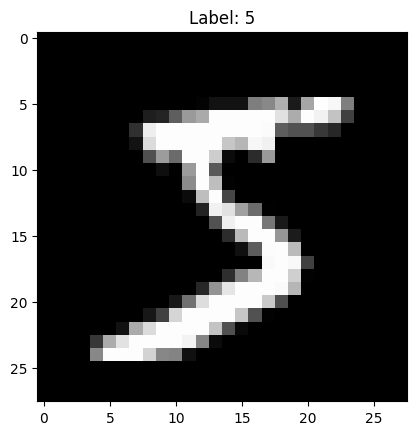

In [30]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [31]:
# Preprocess the data
# add colour channel as expected by conv2D
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalise images between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# one hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [33]:
# Build the model
model = Sequential()
model.add(Input(shape=(28, 28, 1))) 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(test_images, test_labels))

# Evaluate the model
score = model.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2024-06-08 07:20:48.964429: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 07:20:48.981292: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8204 - loss: 0.6001 - val_accuracy: 0.9729 - val_loss: 0.0896
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9600 - loss: 0.1351 - val_accuracy: 0.9800 - val_loss: 0.0642
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9704 - loss: 0.0997 - val_accuracy: 0.9832 - val_loss: 0.0500
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9756 - loss: 0.0799 - val_accuracy: 0.9835 - val_loss: 0.0462
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9791 - loss: 0.0678 - val_accuracy: 0.9847 - val_loss: 0.0471
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9817 - loss: 0.0603 - val_accuracy: 0.9864 - val_loss: 0.0393
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9817 - loss: 0.0573 - val_accuracy: 0.9871 - val_loss: 0.0374
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9842 - loss: 0.0508 - 

In [39]:
# After training the model
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)  # Convert predictions to labels
true_labels = np.argmax(test_labels, axis=1)  # Convert one-hot encoded y_test to labels

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



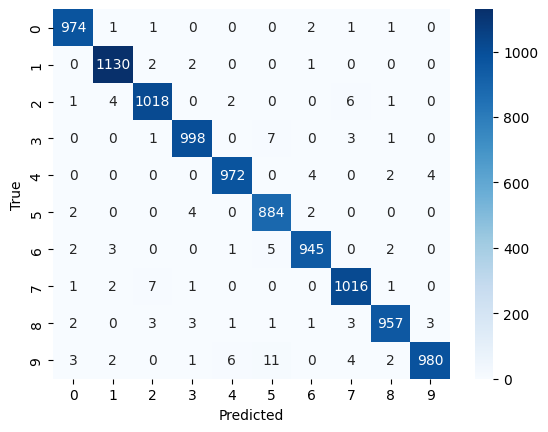

In [43]:
# Create a confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Use Seaborn to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()